## Exploratory Data Analysis


In [3]:
# Importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Importing data
data = pd.read_csv(r"data\framingham.csv")

In [20]:
# The view of the data
data[data["diabetes"]==1].head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
37,1,52,1.0,0,0.0,0.0,0,1,1,178.0,160.0,98.0,40.11,75.0,225.0,0
44,0,53,3.0,0,0.0,1.0,0,1,1,311.0,206.0,92.0,21.51,76.0,215.0,1
56,0,54,1.0,1,9.0,0.0,0,0,1,266.0,114.0,76.0,17.61,88.0,55.0,0
66,0,62,1.0,0,0.0,0.0,0,1,1,212.0,190.0,99.0,29.64,100.0,202.0,0
96,0,63,4.0,1,20.0,0.0,0,0,1,239.0,134.0,80.0,26.64,88.0,126.0,0
247,0,40,2.0,1,20.0,0.0,0,0,1,NaN,114.0,65.0,21.19,61.0,NaN,1
249,0,60,1.0,1,20.0,0.0,0,0,1,180.0,200.0,122.5,44.27,88.0,150.0,0
260,1,52,3.0,0,0.0,0.0,0,1,1,240.0,146.0,89.0,24.59,64.0,73.0,0
284,1,68,1.0,0,0.0,0.0,0,1,1,164.0,142.0,85.0,30.28,70.0,120.0,1
294,0,47,1.0,1,25.0,0.0,0,1,1,258.0,195.0,90.0,NaN,86.0,NaN,1


In [6]:
# The shape of the data 
print("#"*50)
print(f"The shape of the data is:\n {data.shape}")

'''
The data has got 4240 samples with 16 columns
'''
print("#"*50)

##################################################
The shape of the data is:
 (4240, 16)
##################################################


In [7]:
# The information about the data
display(data.info())
'''
-All the data types are correct
-Data contains some missing values
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


None

'\n-All the data types are correct\n-Data contains some missing values\n'

In [8]:
# Checking for the number and percentage of null values in the data
data_columns = data.columns.to_list()
missing_data = {}

# Compiling the columns for use later
missing_data_columns = []

for i, column in enumerate(data_columns):
  if data[column].isnull().sum()>0:
   missing_data_columns.append(column)
   missing_data[column] = data[column].isnull().sum()
   
df_missing = pd.Series(missing_data).to_frame(name="# of_missing_data")
df_missing["%tage_of_missing_data"]  = round(df_missing["# of_missing_data"]/len(data[column])*100, 2)
display(df_missing.sort_values(by="# of_missing_data", ascending=False))

print(f"My Plan for filling the missing values")
print("- For %tage_of_missing_data => 1, I use use knn_imputer to fill them")
print("- For %tage_of_missing_data < 1, I use use knn_imputer to fill them")

,# of_missing_data,%tage_of_missing_data
glucose,388,9.15
education,105,2.48
BPMeds,53,1.25
totChol,50,1.18
cigsPerDay,29,0.68
BMI,19,0.45
heartRate,1,0.02


My Plan for filling the missing values
- For %tage_of_missing_data => 1, I use use knn_imputer to fill them
- For %tage_of_missing_data < 1, I use use knn_imputer to fill them


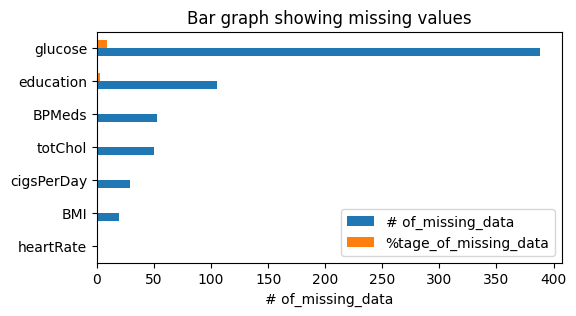

In [9]:

# A visual is always better than a table
fig, ax=plt.subplots(figsize=(6, 3))
df_missing.sort_values(by="# of_missing_data", ascending=True).plot(kind='barh', ax=ax)
plt.title("Bar graph showing missing values")
plt.xlabel("# of_missing_data")
plt.show()

In [10]:
# Checking for duplicate values

"""
There are no duplicates in this data
"""
data.duplicated().sum()

np.int64(0)

In [11]:
"""
Since the number of missing of missing vlues is relatively small compared to the data, I will first drop them to get the bigger picture of the data
I will impute them in the cleaning phase 
"""
data_EDA = data.copy()
data_EDA.dropna(inplace=True)
print("#"*50)
print(f"The shape of the new data is: {data_EDA.shape}")
print("#"*50)
print(f"The amount of data lost is: {len(data)-len(data_EDA)}")
print("#"*50)


##################################################
The shape of the new data is: (3658, 16)
##################################################
The amount of data lost is: 582
##################################################


In [12]:
# General statistics about the data
data_EDA.describe().T

,count,mean,std,min,25%,50%,75%,max
male,3658.0,0.443685,0.496886,0.00,0.00,0.00,1.0000,1.0
age,3658.0,49.551941,8.562029,32.00,42.00,49.00,56.0000,70.0
education,3658.0,1.980317,1.022656,1.00,1.00,2.00,3.0000,4.0
currentSmoker,3658.0,0.489065,0.499949,0.00,0.00,0.00,1.0000,1.0
cigsPerDay,3658.0,9.025424,11.921590,0.00,0.00,0.00,20.0000,70.0
BPMeds,3658.0,0.030344,0.171557,0.00,0.00,0.00,0.0000,1.0
prevalentStroke,3658.0,0.005741,0.075561,0.00,0.00,0.00,0.0000,1.0
prevalentHyp,3658.0,0.311646,0.463229,0.00,0.00,0.00,1.0000,1.0
diabetes,3658.0,0.027064,0.162292,0.00,0.00,0.00,0.0000,1.0
totChol,3658.0,236.847731,44.097681,113.00,206.00,234.00,263.0000,600.0


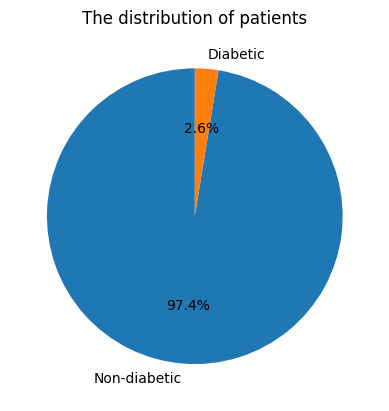

In [13]:
# Lets check the distribution with the target variable
"""
The data is not equally distributed, over sampling is required, using a tree based algorithm is better for imbalanced data
"""
distribution = data['diabetes'].value_counts(normalize=True)
plt.pie(x=distribution, autopct="%1.1f%%", labels=['Non-diabetic', 'Diabetic'], startangle=90)
plt.title("The distribution of patients")
plt.show()


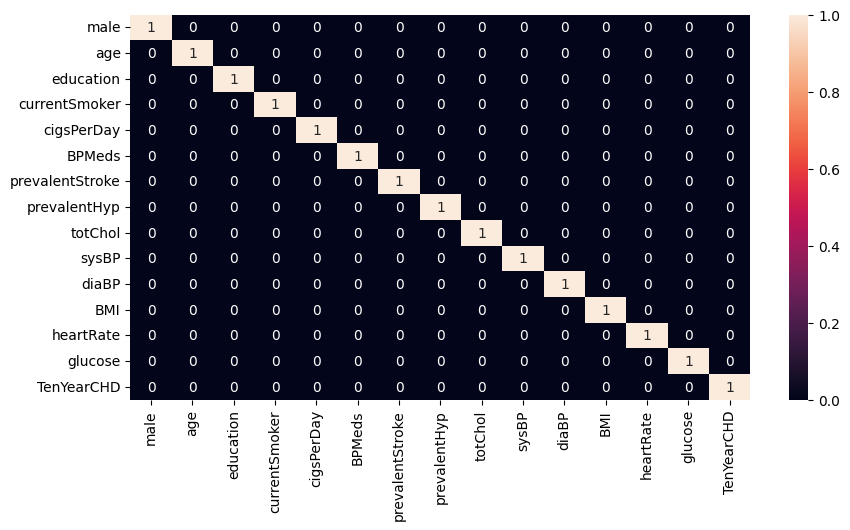

In [14]:
# Checking for multicolinearity
'''
Using a threshold of 0.8, I will drop columns that are greater than the threshold
There is no multicolinearuty in our dataset
'''

threshold = 0.8
corr = data_EDA.drop('diabetes', axis=1).corr()>threshold
plt.subplots(figsize=(10, 5))
sns.heatmap(data=corr, annot=True)
plt.show()

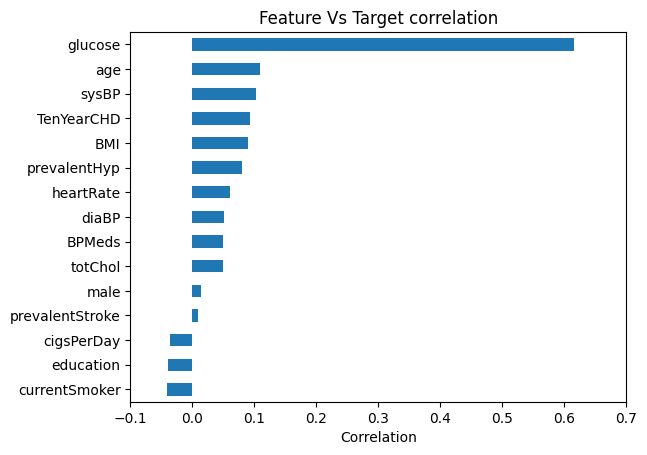

In [15]:
# Correlation with the target vector

"""
-From the figure below, we can agree that the least corellated values are the 'male' and 'prevalentStroke' columns
-Glucose has the highest correlation with the target
-Its best for me to drop the least corellated features ['male', 'prevalentStroke']

"""
corr_columns = data_EDA.drop("diabetes", axis=1).columns.to_list()
corr_data = {}

for col in corr_columns:
  correlation = data_EDA[col].corr(data_EDA['diabetes'])
  corr_data[col] = correlation

pd.Series(corr_data).sort_values(ascending=True).plot(kind='barh')
plt.xlim(-0.1, 0.7)
plt.title("Feature Vs Target correlation")
plt.xlabel("Correlation")
plt.show()

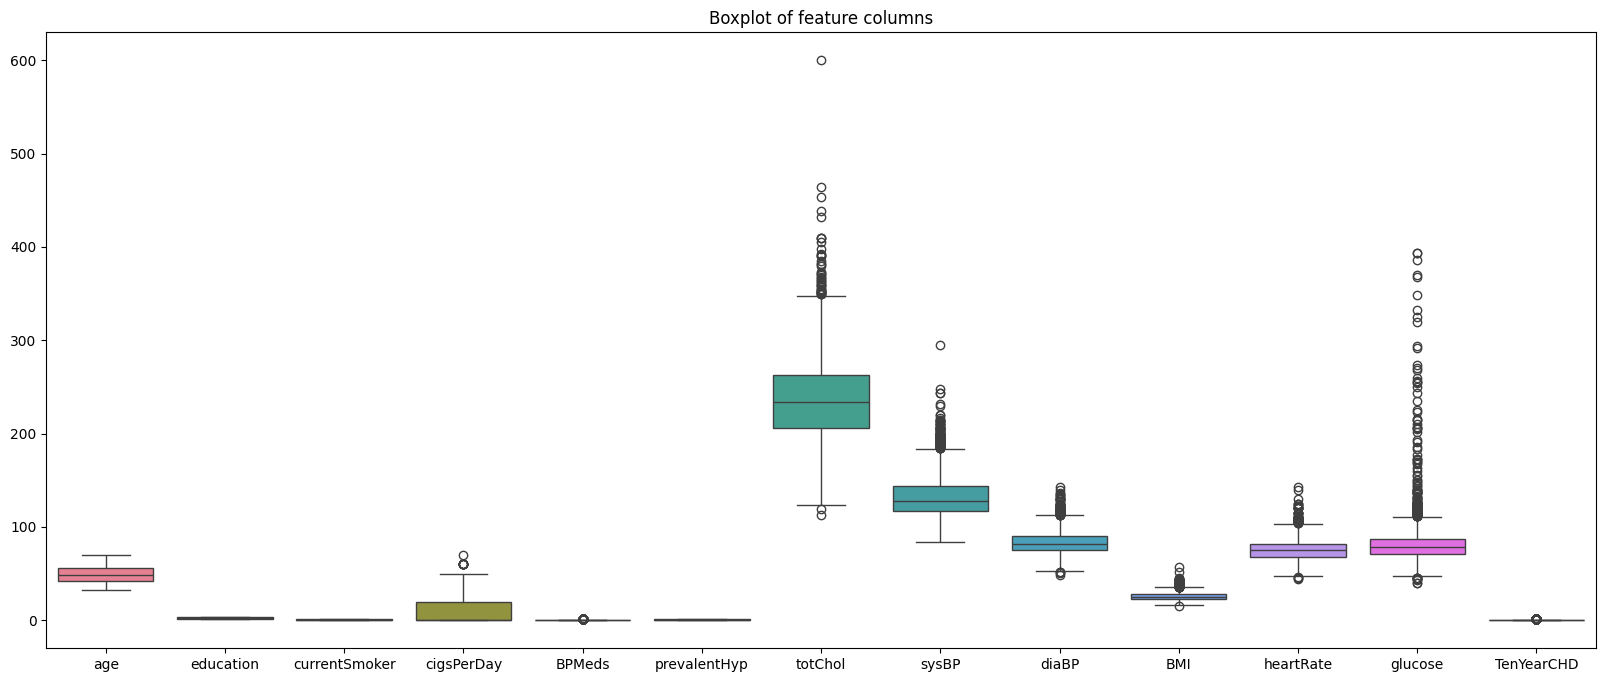

In [16]:
# Checking for outliers
'''
Since I already planned to drop the columns 'prevalentStroke' and 'male', I will also drop them from the boxplots
since they are less correlated to the target

- The samples in the data are too small for training the model, therefore dropping outliers is not an option since it will reduce the size of the samples.
-  We shall use other techniques like bins to try to address this issue
- I plan to use a tree based algorithmn, it performs better with tree based algorithmns
'''
plt.subplots(figsize=(20, 8))
sns.boxplot(data_EDA.drop(["diabetes", "male", 'prevalentStroke'], axis=1))
plt.title("Boxplot of feature columns")
plt.show()

## Cleaning function

I have made a habbit that when Iam performing EDA, I start updating the cleaning funtion each time I discover something that needs correction in the data.
That way, I keep track of what needs to be done in the cleaning phase of the data


In [17]:
# Cleaning function
def clean_data(filepath):
  '''
  This function cleans the data basing on the ideas gotten from EDA
  '''
  # Read the data
  df = pd.read_csv(filepath)

  # Dropping least correlated features ['male', 'prevalentStroke']
  df = df.drop(columns=['male', 'prevalentStroke'], axis=1)

  # Use knn imputer for filling mising values
  imputer = KNNImputer(n_neighbors=4)

  imputed = imputer.fit_transform(df)

  df = pd.DataFrame(imputed, columns=df.columns)

  # Changing 'diabetes' from float to int
  df['diabetes'] = df['diabetes'].apply(lambda x: 0 if x==0.0 else 1)

  return df

In [18]:
df = clean_data(r'data\framingham.csv')

In [19]:
print("#"*50)
print(f"The shape of the cleaned data is: {df.shape}")
print("#"*50)
df.head(10)

##################################################
The shape of the cleaned data is: (4240, 14)
##################################################


,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39.0,4.0,0.0,0.0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0.0
1,46.0,2.0,0.0,0.0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0.0
2,48.0,1.0,1.0,20.0,0.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0.0
3,61.0,3.0,1.0,30.0,0.0,1.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1.0
4,46.0,3.0,1.0,23.0,0.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
5,43.0,2.0,0.0,0.0,0.0,1.0,0,228.0,180.0,110.0,30.30,77.0,99.0,0.0
6,63.0,1.0,0.0,0.0,0.0,0.0,0,205.0,138.0,71.0,33.11,60.0,85.0,1.0
7,45.0,2.0,1.0,20.0,0.0,0.0,0,313.0,100.0,71.0,21.68,79.0,78.0,0.0
8,52.0,1.0,0.0,0.0,0.0,1.0,0,260.0,141.5,89.0,26.36,76.0,79.0,0.0
9,43.0,1.0,1.0,30.0,0.0,1.0,0,225.0,162.0,107.0,23.61,93.0,88.0,0.0
